# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.utils import resample

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud = pd.read_csv("card_transdata.csv")
fraud.head()


,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
fraud.dtypes

Unnamed: 0                          int64
distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [4]:
fraud["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [5]:
target = fraud["fraud"]
features = fraud.drop(columns="fraud")


In [6]:
target.value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [9]:
pred = model.predict(X_test)
# Get the predicted probabilities
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [10]:
#APPLYING THE MODEL TO THE ENTIRE DATABASE
pred_all = model.predict(features)
pred_all_prob = model.predict_proba(features)[:, 1]

Optimal Threshold: 0.44968265147970077


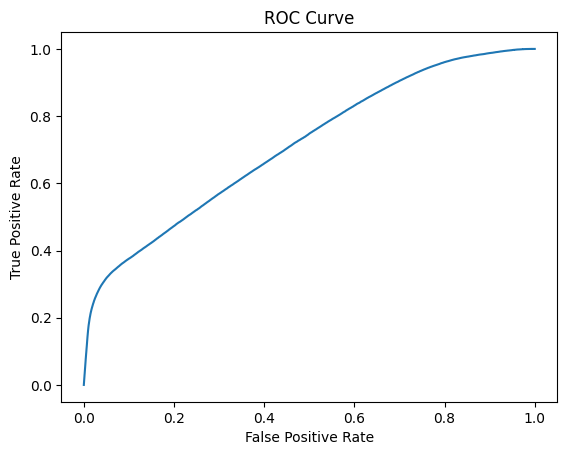

In [11]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(target, pred_all_prob)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)


# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

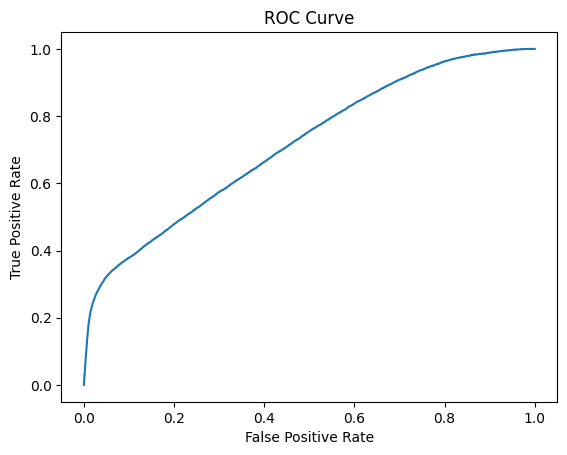

In [12]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [13]:
y_test.value_counts()

fraud
0.0    182557
1.0     17443
Name: count, dtype: int64

[[863099  49498]
 [ 59059  28344]]


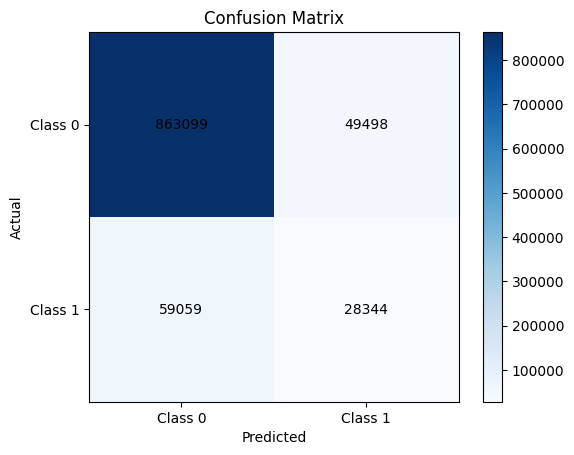

In [14]:
#CONFUSION MATRIX FOR THE ENTIRE DATABASE
cm = confusion_matrix(target, pred_all)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

plt.show()

[[172761   9796]
 [ 11732   5711]]


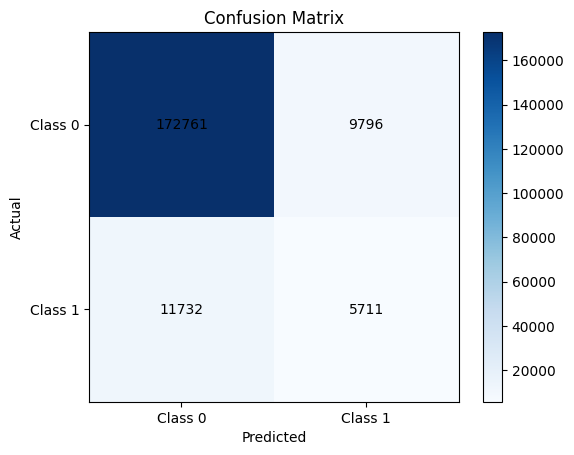

In [15]:
cm = confusion_matrix(y_test, pred)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

plt.show()

In [16]:
print("R2 score", model.score(X_test, y_test))
print(classification_report(y_pred = pred, y_true = y_test))

R2 score 0.89236
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    182557
         1.0       0.37      0.33      0.35     17443

    accuracy                           0.89    200000
   macro avg       0.65      0.64      0.64    200000
weighted avg       0.89      0.89      0.89    200000



In [17]:
#metric for the entire database
print("R2 score", model.score(features, target))
print(classification_report(y_pred = pred_all, y_true = target))

R2 score 0.891443
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94    912597
         1.0       0.36      0.32      0.34     87403

    accuracy                           0.89   1000000
   macro avg       0.65      0.64      0.64   1000000
weighted avg       0.89      0.89      0.89   1000000



## Oversampling

In [18]:
type(y_train)

pandas.core.series.Series

In [19]:
train = pd.DataFrame(X_train, columns = X_train.columns)

In [20]:
train["fraud"] = y_train.values

In [21]:
fraud_1 = train[train["fraud"] == 1]
fraud_0 = train[train["fraud"] == 0]
print(fraud_1.shape,fraud_0.shape)

(69960, 9) (730040, 9)


In [22]:
fraud_1_oversampled = resample(fraud_1, 
                                    replace=True, 
                                    n_samples = len(fraud_0),
                                    random_state=42)

In [23]:
fraud_0_undersampled = resample(fraud_0, 
                                    replace=True, 
                                    n_samples = len(fraud_1),
                                    random_state=42)

In [24]:
print(fraud_1_oversampled.shape)

(730040, 9)


In [25]:
print(fraud_0_undersampled.shape)

(69960, 9)


In [26]:
train_over = pd.concat([fraud_1_oversampled, fraud_0])
train_over.shape

(1460080, 9)

In [27]:
train_under = pd.concat([fraud_0_undersampled, fraud_1])
train_under.shape

(139920, 9)

In [28]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [29]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [30]:
model_over = LogisticRegression()
model_over.fit(X_train_over, y_train_over)

LogisticRegression()

In [31]:
pred = model_over.predict(X_test)
# Get the predicted probabilities
y_pred_prob = model_over.predict_proba(X_test)[:, 1]

Optimal Threshold: 0.6339050885797766


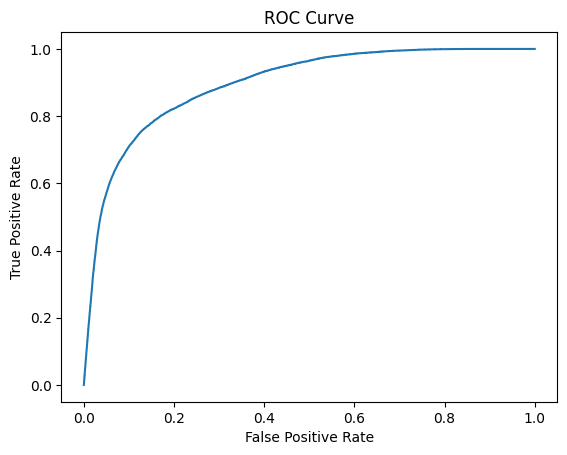

In [32]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)


# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [33]:
print("R2 score", model_over.score(X_test, y_test))
print(classification_report(y_pred = pred, y_true = y_test))

R2 score 0.71737
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82    182557
         1.0       0.22      0.88      0.35     17443

    accuracy                           0.72    200000
   macro avg       0.60      0.79      0.59    200000
weighted avg       0.92      0.72      0.78    200000



In [34]:
# Assuming you have a trained logistic regression model "model" and test data "X_test"
threshold = 0.6339050885797766  # Customized threshold

# Apply the customized threshold for classification
pred_custom = (y_pred_prob > threshold).astype(int)

In [35]:
print(classification_report(y_pred = pred_custom, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90    182557
         1.0       0.32      0.79      0.46     17443

    accuracy                           0.84    200000
   macro avg       0.65      0.82      0.68    200000
weighted avg       0.92      0.84      0.87    200000



[[128069  54488]
 [  2038  15405]]


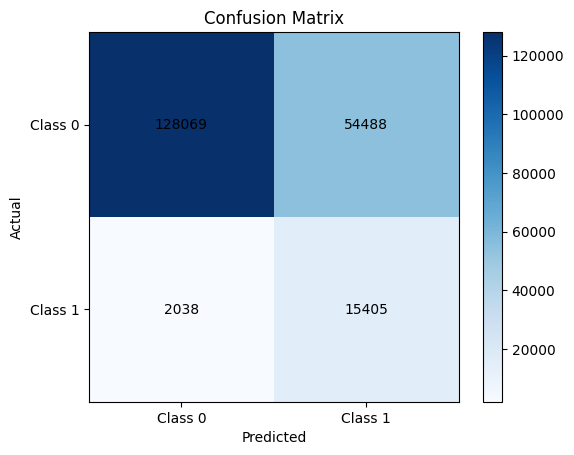

In [36]:
cm = confusion_matrix(y_test, pred)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

plt.show()

[[153919  28638]
 [  3705  13738]]


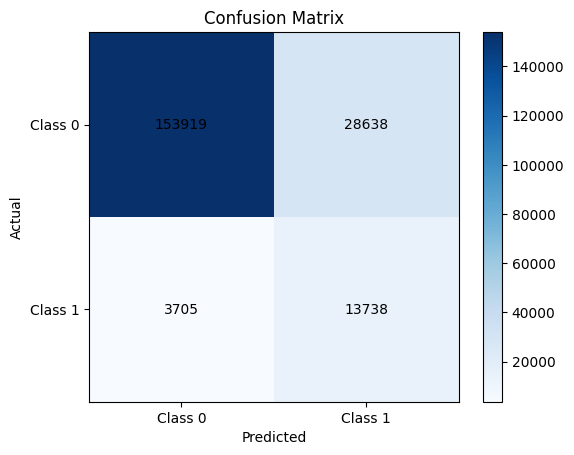

In [37]:
cm = confusion_matrix(y_test, pred_custom)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

plt.show()

## SMOTE

In [38]:
sm = SMOTE(random_state = 1, sampling_strategy = 1.0)

In [39]:
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [40]:
model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [41]:
pred = model_sm.predict(X_test)
# Get the predicted probabilities
y_pred_prob = model_sm.predict_proba(X_test)[:, 1]

Optimal Threshold: 0.6425882844149357


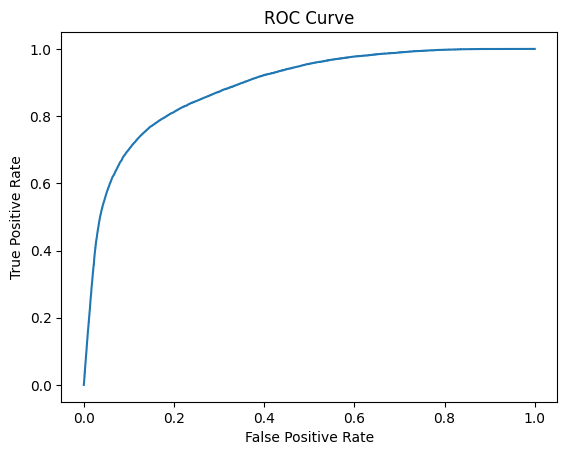

In [42]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)


# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [43]:
print("R2 score", model_sm.score(X_test, y_test))
print(classification_report(y_pred = pred, y_true = y_test))

R2 score 0.72732
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.83    182557
         1.0       0.22      0.87      0.36     17443

    accuracy                           0.73    200000
   macro avg       0.60      0.79      0.59    200000
weighted avg       0.92      0.73      0.79    200000



In [44]:
# Assuming you have a trained logistic regression model "model" and test data "X_test"
threshold = 0.6425882844149357  # Customized threshold

# Apply the customized threshold for classification
pred_custom = (y_pred_prob > threshold).astype(int)

In [45]:
print(classification_report(y_pred = pred_custom, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91    182557
         1.0       0.33      0.77      0.46     17443

    accuracy                           0.85    200000
   macro avg       0.65      0.81      0.69    200000
weighted avg       0.92      0.85      0.87    200000



**Steps:**

[[130368  52189]
 [  2347  15096]]


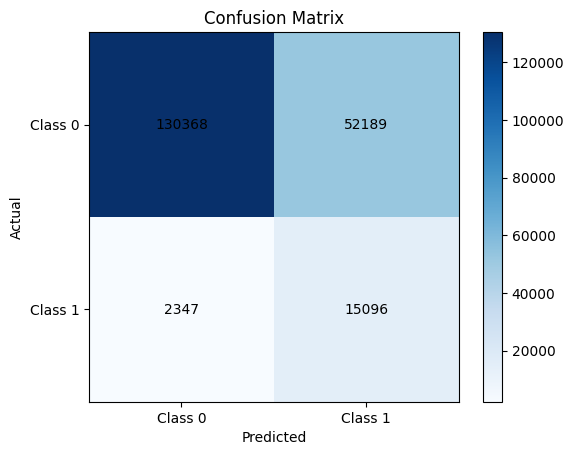

In [46]:
cm = confusion_matrix(y_test, pred)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

plt.show()

[[155682  26875]
 [  4042  13401]]


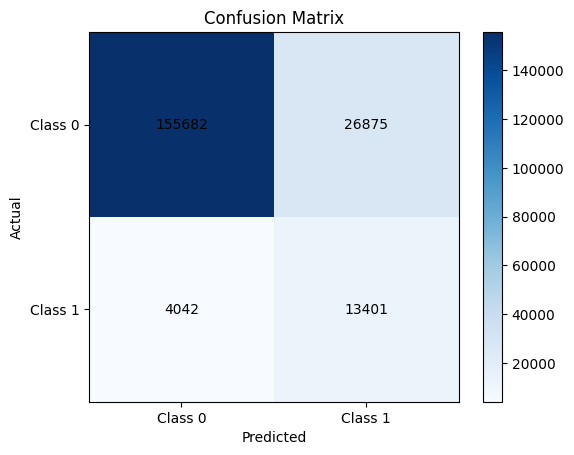

In [47]:
cm = confusion_matrix(y_test, pred_custom)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

plt.show()

## Undersampling

In [48]:
model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)

LogisticRegression()

In [49]:
pred = model_under.predict(X_test)
# Get the predicted probabilities
y_pred_prob = model_under.predict_proba(X_test)[:, 1]

Optimal Threshold: 0.6220049198531921


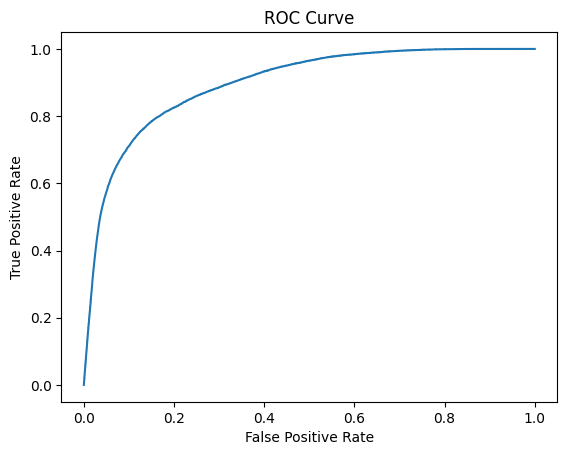

In [50]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)


# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [51]:
print("R2 score", model_under.score(X_test, y_test))
print(classification_report(y_pred = pred, y_true = y_test))

R2 score 0.723505
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82    182557
         1.0       0.22      0.88      0.36     17443

    accuracy                           0.72    200000
   macro avg       0.60      0.80      0.59    200000
weighted avg       0.92      0.72      0.78    200000



In [52]:
# Assuming you have a trained logistic regression model "model" and test data "X_test"
threshold = 0.6220049198531921  # Customized threshold

# Apply the customized threshold for classification
pred_custom = (y_pred_prob > threshold).astype(int)

In [53]:
print(classification_report(y_pred = pred_custom, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91    182557
         1.0       0.33      0.79      0.46     17443

    accuracy                           0.84    200000
   macro avg       0.65      0.82      0.69    200000
weighted avg       0.92      0.84      0.87    200000



[[154593  27964]
 [  3701  13742]]


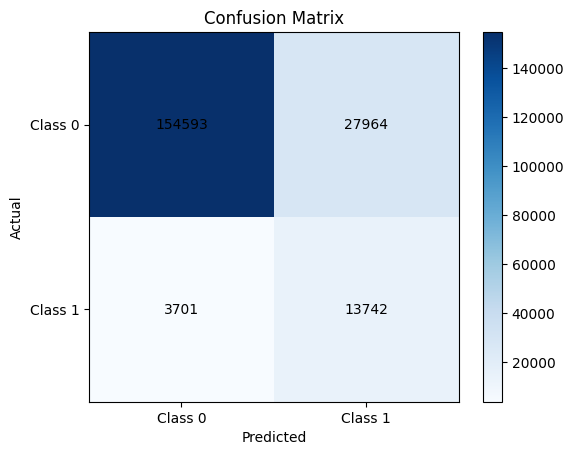

In [54]:
cm = confusion_matrix(y_test, pred_custom)
print(cm)

# Plot the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["Class 0", "Class 1"])
plt.yticks([0, 1], ["Class 0", "Class 1"])

plt.show()

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 